In [1]:
%matplotlib inline


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import time



In [3]:

#test train data split 

splitfolders.ratio("./data/flowers/", output="output", seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 4317 files [00:34, 124.77 files/s]


In [4]:
#Define Transforms
transform = transforms.Compose(
    [transforms.Resize((150,150)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#Hyper Parameters
batch_size = 32
learning_rate = 0.001

traindataset = datasets.ImageFolder('./output/train', transform=transform)
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=batch_size,shuffle=True)

testdataset = datasets.ImageFolder('./output/val', transform=transform)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=batch_size, shuffle=True)

classes = ('daisy','dandelion','rose','sunflower','tulip')



In [5]:
len(trainloader)

108

In [6]:
len(testloader)

28

In [7]:
print(traindataset.class_to_idx)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


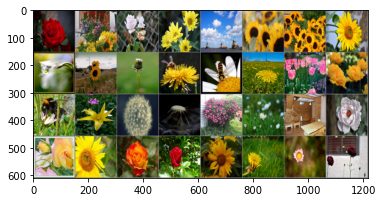

rose  sunflower rose  sunflower tulip sunflower sunflower sunflower dandelion sunflower dandelion dandelion daisy dandelion tulip tulip daisy tulip dandelion dandelion rose  daisy sunflower rose  rose  sunflower rose  rose  sunflower dandelion daisy rose 


In [8]:


# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:



class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 15 * 15, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv2(x)))
       # nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:


criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
def get_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return round(correct/total,3)

Epoch [1/35], Step [108/108], Time taken:[75.257 seconds], Loss: 2.3330
Epoch [2/35], Step [108/108], Time taken:[50.988 seconds], Loss: 2.1190
Epoch [3/35], Step [108/108], Time taken:[50.87 seconds], Loss: 1.9900
Epoch [4/35], Step [108/108], Time taken:[52.658 seconds], Loss: 1.8780
Epoch [5/35], Step [108/108], Time taken:[54.963 seconds], Loss: 1.7910
Epoch [6/35], Step [108/108], Time taken:[55.909 seconds], Loss: 1.6550
Epoch [7/35], Step [108/108], Time taken:[56.44 seconds], Loss: 1.5210
Epoch [8/35], Step [108/108], Time taken:[58.02 seconds], Loss: 1.3560
Epoch [9/35], Step [108/108], Time taken:[51.585 seconds], Loss: 1.2510
Epoch [10/35], Step [108/108], Time taken:[50.724 seconds], Loss: 1.1600
Epoch [11/35], Step [108/108], Time taken:[51.388 seconds], Loss: 1.1060
Epoch [12/35], Step [108/108], Time taken:[50.089 seconds], Loss: 1.0590
Epoch [13/35], Step [108/108], Time taken:[51.382 seconds], Loss: 1.0380
Epoch [14/35], Step [108/108], Time taken:[50.14 seconds], Loss

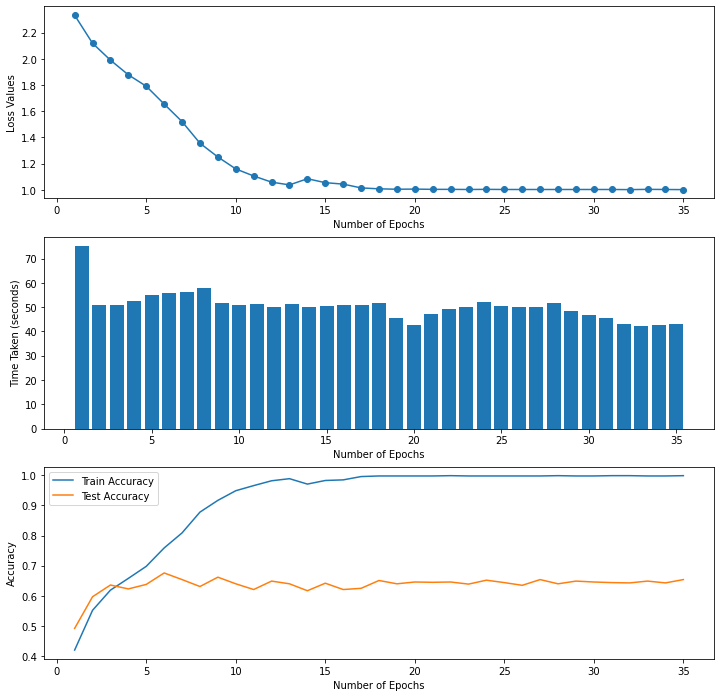

Finished Training


In [12]:
num_of_epochs = 35
loss_list = []
time_list = []
train_list = []
test_list = []
fig, axs = plt.subplots(3)
fig.set_figheight(12)
fig.set_figwidth(12)

for epoch in range(num_of_epochs):  # loop over the dataset multiple times
    epoch_start_time = time.time()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()
        #for accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        correct+= (predicted == labels).sum().item()
        total+=labels.size(0)
    epoch_end_time = time.time()
    avg_running_loss = round(running_loss/i+1,3)
    time_taken = round(epoch_end_time - epoch_start_time,3)
    #plot purpose 
    loss_list.append(avg_running_loss)
    time_list.append(time_taken)
    train_list.append(round(correct/total,3))
    test_list.append(get_accuracy(testloader))
    
    # print statistics
    print (f'Epoch [{epoch+1}/{num_of_epochs}], Step [{i+1}/{len(trainloader)}], Time taken:[{time_taken} seconds], Loss: {avg_running_loss:.4f}')
    
x_values = np.arange(1,num_of_epochs+1)
axs[0].plot(x_values,loss_list,marker='o')
axs[0].set_xlabel("Number of Epochs")
axs[0].set_ylabel("Loss Values")
axs[1].bar(x_values,time_list)
axs[1].set_xlabel("Number of Epochs")
axs[1].set_ylabel("Time Taken (seconds)")
axs[2].plot(x_values,train_list , label = 'Train Accuracy')
axs[2].plot(x_values,test_list, label = 'Test Accuracy')
axs[2].set_xlabel("Number of Epochs")
axs[2].set_ylabel("Accuracy")
axs[2].legend()
plt.show()      
print('Finished Training')

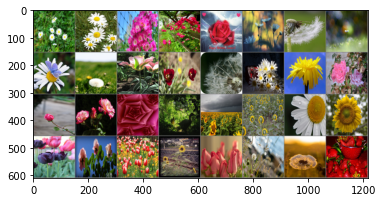

GroundTruth:  daisy daisy rose  rose  rose  daisy dandelion daisy daisy dandelion tulip tulip dandelion daisy dandelion rose  rose  rose  rose  rose  sunflower sunflower daisy sunflower tulip rose  tulip sunflower rose  dandelion dandelion tulip


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [14]:
PATH = './flowers_net.pth'
torch.save(net.state_dict(), PATH)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  daisy daisy rose  tulip tulip dandelion dandelion dandelion daisy sunflower tulip tulip dandelion daisy sunflower rose  daisy tulip rose  dandelion sunflower sunflower daisy sunflower tulip tulip tulip daisy rose  dandelion dandelion tulip


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    

Accuracy for class: daisy is 64.7 %
Accuracy for class: dandelion is 72.5 %
Accuracy for class: rose  is 45.9 %
Accuracy for class: sunflower is 78.2 %
Accuracy for class: tulip is 64.5 %
